In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from fastai.vision.all import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or Kaggle, which makes some difference for the code below.
try:
    import google.colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [4]:
# This is copied from Howard's notebook: https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data


#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [5]:
# Make sure we're using the latest version of fastai
if colab:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()

elif kaggle:
    !pip install -Uqq fastai

In [6]:
from pathlib import Path
if colab:
    from google.colab import drive
    drive.mount("/content/gdrive")
    DATA = Path('/content/gdrive/MyDrive/DAT255/')
    DATA.mkdir(exist_ok=True, parents=True)
    
elif kaggle:
    DATA = Path('/kaggle/input/ansikter/full')
    

In [7]:
DATA.ls()

(#8) [Path('/kaggle/input/ansikter/full/surprise'),Path('/kaggle/input/ansikter/full/fear'),Path('/kaggle/input/ansikter/full/neutral'),Path('/kaggle/input/ansikter/full/sadness'),Path('/kaggle/input/ansikter/full/disgust'),Path('/kaggle/input/ansikter/full/contempt'),Path('/kaggle/input/ansikter/full/happiness'),Path('/kaggle/input/ansikter/full/anger')]

In [8]:
get_image_files(DATA)[:5]

(#5) [Path('/kaggle/input/ansikter/full/surprise/S085_003_00000013.png'),Path('/kaggle/input/ansikter/full/surprise/S138_004_00000013.png'),Path('/kaggle/input/ansikter/full/surprise/S068_003_00000014.png'),Path('/kaggle/input/ansikter/full/surprise/m06_dfs_p.JPG'),Path('/kaggle/input/ansikter/full/surprise/f13_dfs_p.JPG')]

In [9]:
ansikt = DataBlock(
    blocks=(ImageBlock, CategoryBlock),             # Define data types for the input and output
    get_items=get_image_files,                      # Function to get image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),# Split data based on grandparent folder name
    get_y=parent_label,                             # Get labels from parent folder names
    item_tfms=Resize(224),                  # Resize images to 224x224 (options: aug_transforms(224), RandomResizedCrop(460))
    batch_tfms=[
        *aug_transforms(),                          # Apply some data augmentation (see Chapter 2)
        Normalize.from_stats(*imagenet_stats)       # Normalize image intensities (because pretraining)
    ]
)




In [10]:
dls = ansikt.dataloaders(DATA, bs=64)

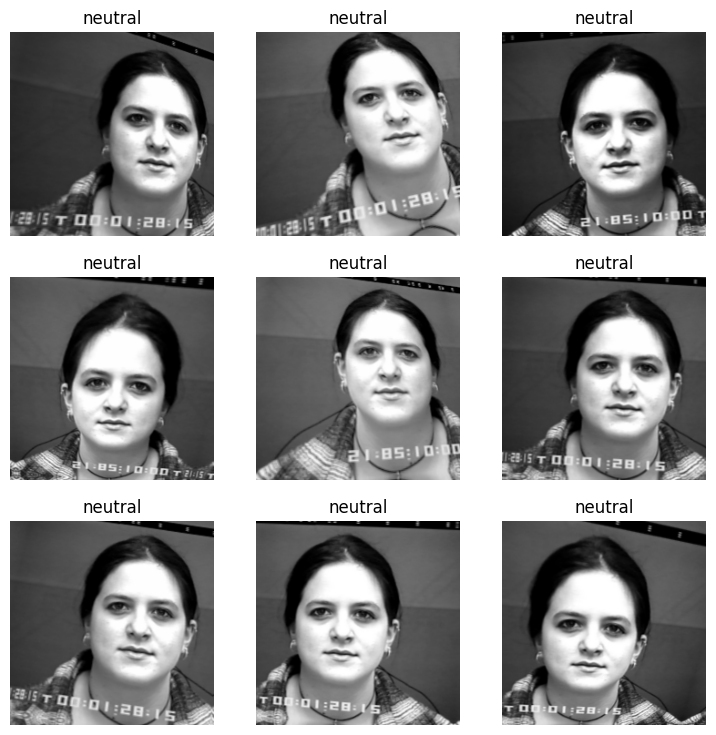

In [11]:
dls.show_batch(unique=True)

In [12]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 214MB/s] 


In [13]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.635291,1.712864,0.566775,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.478402,1.127061,0.723127,00:09
1,1.127879,0.795575,0.814332,00:08
2,0.893498,0.677691,0.785016,00:08
3,0.705076,0.416115,0.872964,00:09
4,0.556159,0.408122,0.869707,00:08


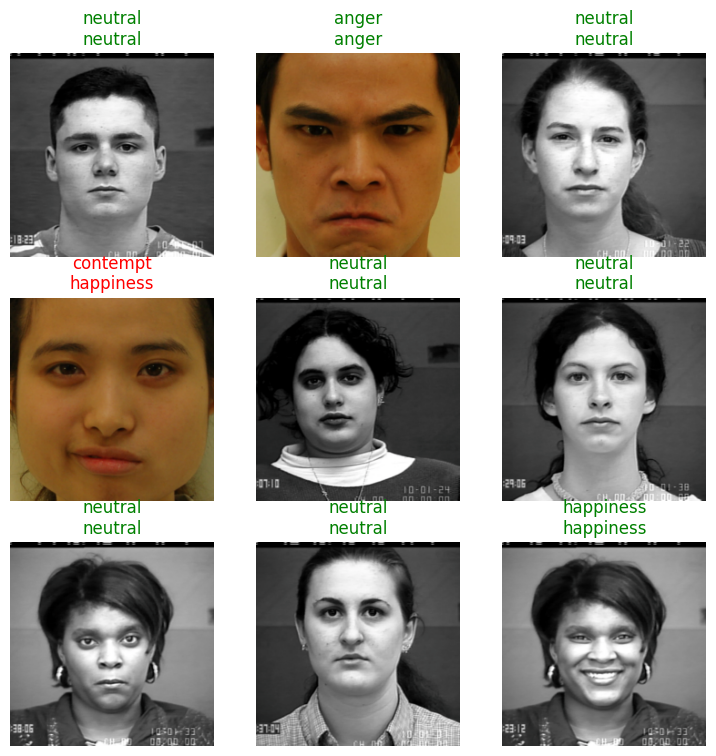

In [14]:
learn.show_results()

In [15]:
#learn.save('my_model')

In [16]:
#learn = load('my_model')


In [17]:
learn.export('model.pkl')

Predicted emotion: surprise
Predictions index: 7
Probabilities: tensor([2.0894e-03, 5.9901e-03, 2.4441e-05, 1.7560e-02, 3.2065e-04, 4.5973e-04,
        2.6189e-02, 9.4737e-01])


<Axes: >

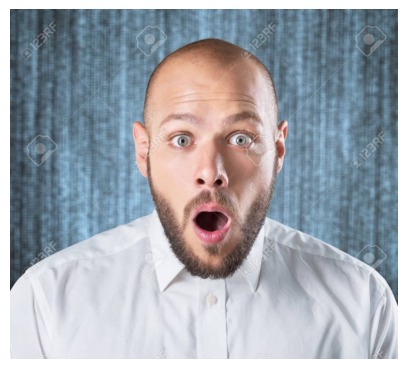

In [18]:
# Eget bilde
img = PILImage.create('/kaggle/input/ansikter/bilder/img4.jpg')

# Get predictions
pred_class, pred_idx, outputs = learn.predict(img)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

img.show()

Predicted emotion: anger
Predictions index: 0
Probabilities: tensor([8.1351e-01, 1.7854e-02, 5.5037e-02, 4.6359e-04, 1.3299e-03, 1.1041e-01,
        5.0716e-04, 8.9100e-04])


<Axes: >

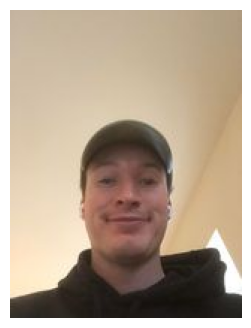

In [19]:
# Eget bilde
img1 = PILImage.create('/kaggle/input/ansikter/bilder/img2.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img1)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img1.show()

Predicted emotion: surprise
Predictions index: 7
Probabilities: tensor([0.3158, 0.0224, 0.0258, 0.1225, 0.0053, 0.0479, 0.0094, 0.4508])


<Axes: >

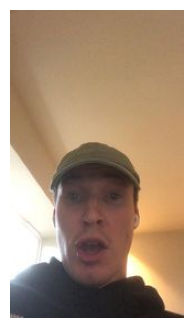

In [20]:
# Eget bilde
img1 = PILImage.create('/kaggle/input/ansikter/bilder/img3.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img1)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img1.show()

Predicted emotion: disgust
Predictions index: 2
Probabilities: tensor([1.9067e-01, 6.1175e-03, 6.1319e-01, 1.7067e-04, 3.5332e-02, 8.4492e-04,
        1.5039e-01, 3.2804e-03])


<Axes: >

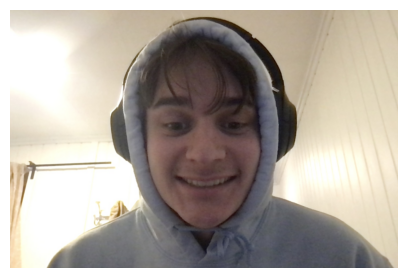

In [21]:
# Eget bilde
img1 = PILImage.create('/kaggle/input/bilder/Photo.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img1)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img1.show()

Predicted emotion: disgust
Predictions index: 2
Probabilities: tensor([1.8106e-02, 8.1323e-04, 9.4994e-01, 3.4004e-06, 9.4749e-04, 1.8159e-04,
        2.9896e-02, 1.1663e-04])


<Axes: >

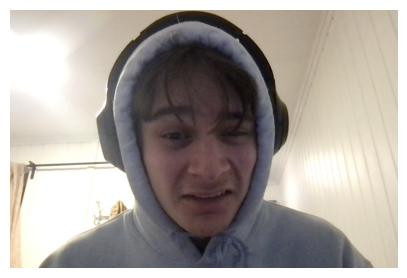

In [22]:
# Eget bilde
img1 = PILImage.create('/kaggle/input/bilder/Photo2.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img1)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img1.show()

Predicted emotion: neutral
Predictions index: 5
Probabilities: tensor([1.2084e-01, 7.1674e-02, 5.7961e-03, 3.2218e-04, 3.3232e-04, 7.5998e-01,
        3.0847e-03, 3.7977e-02])


<Axes: >

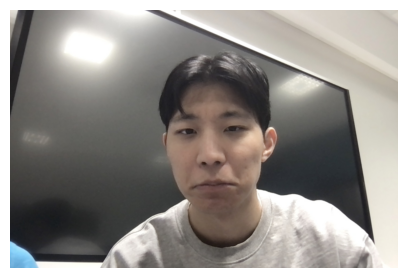

In [23]:
# Eget bilde
img1 = PILImage.create('/kaggle/input/bilder/samuelpic.jpg')

# Get predictions (no need to apply after_batch transforms explicitly, predict does that)
pred_class, pred_idx, outputs = learn.predict(img1)

# Print results
print(f'Predicted emotion: {pred_class}')
print(f'Predictions index: {pred_idx}')
print(f'Probabilities: {outputs}')

# Show the image
img1.show()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
interp.plot_top_losses(6)